# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [2]:
# Loading all the libraries
import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt
from math import factorial
import math

## Load data

In [3]:
# Loading the data files into different DataFrames

calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv')
messages = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')

## Prepare the data

## Plans

In [4]:
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [5]:
plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Fix data

In [6]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Enrich data

In [7]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,NaN
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,NaN
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,NaN
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN


## Users

In [8]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [9]:
users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


The format of reg_date column should be datetime64 to be able to analyze. I will also categorize the ages into three categories such as young adult, adult, and senior. This might help me to understand the usage of different age groups in case I need to analyze it further. 



### Fix Data

In [10]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

### Enrich Data

In [11]:
def age_categories(age):
    if  18 <= age <= 25:
        return 'young adult'
    if 25 < age <= 65:
        return 'adult'
    if age > 65:
        return 'senior'

users['age'] = users['age'].apply(age_categories)

## Calls

In [12]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [13]:
calls.head(20)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40




The format of call_date column should be datetime64 to be able to analyze. I will also round up duration column and sort values by user_id and call_date. 

### Fix data

In [14]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

### Enrich data

In [15]:
calls['duration'] = calls['duration'].apply(np.ceil)

In [16]:
calls.sort_values(by=['user_id','call_date'], inplace=True)
calls.reset_index(drop=True)

,id,user_id,call_date,duration
0,1000_544,1000,2018-12-26,5.0
1,1000_826,1000,2018-12-26,10.0
2,1000_93,1000,2018-12-27,9.0
3,1000_145,1000,2018-12-27,14.0
4,1000_247,1000,2018-12-27,15.0
...,...,...,...,...
137730,1499_177,1499,2018-12-29,8.0
137731,1499_203,1499,2018-12-29,14.0
137732,1499_107,1499,2018-12-30,5.0
137733,1499_56,1499,2018-12-31,17.0


## Messages

In [17]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
messages.head(10)


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


The format of message_date column should be datetime64 to be able to analyze. I will also sort values by user_id and message_date. 

### Fix data

In [19]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

### Enrich data

In [20]:
messages.sort_values(by=['user_id','message_date'], inplace=True)
messages.reset_index(drop=True)

,id,user_id,message_date
0,1000_567,1000,2018-12-25
1,1000_255,1000,2018-12-26
2,1000_125,1000,2018-12-27
3,1000_251,1000,2018-12-27
4,1000_502,1000,2018-12-27
...,...,...,...
76046,1497_480,1497,2018-12-29
76047,1497_503,1497,2018-12-29
76048,1497_502,1497,2018-12-30
76049,1497_341,1497,2018-12-31


## Internet

In [21]:
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [22]:
internet.head(10)


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


The format of session_date column should be datetime64 to be able to analyze. I will also sort values by user_id and session_date. 

### Fix data

In [23]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

### Enrich data

In [24]:
internet.sort_values(by=['user_id','session_date'], inplace=True)
internet = internet.reset_index(drop=True)


In [25]:
internet['gb_used'] = internet['mb_used'] / 1024

## Study plan conditions

In [26]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [27]:
# Calculating the number of calls made by each user per month. Save the result.
number_calls = calls.groupby(['user_id', calls.call_date.dt.month]).agg('size')
number_calls = number_calls.to_frame(name= 'number_calls')
number_calls.index.names = ['user_id', 'month']

In [28]:
# Calculating the amount of minutes spent by each user per month. 
minutes_spent = calls.groupby(['user_id', calls.call_date.dt.month]).agg('sum')
minutes_spent.index.names = ['user_id', 'month']

In [29]:
# Calculating the number of messages sent by each user per month. 
number_messages = messages.groupby(['user_id', messages.message_date.dt.month]).agg('size')
number_messages = number_messages.to_frame(name= 'number_messages')
number_messages.index.names = ['user_id', 'month']

In [30]:
# Calculating the volume of internet traffic used by each user per month. 
internet_spent = internet.groupby(['user_id', internet.session_date.dt.month]).agg('sum')
internet_spent.index.names = ['user_id', 'month']

In [31]:
#Rounding up internet usage at the end of each month
def roundup(x):
    return int(math.ceil(x / 100.0)) * 100

internet_spent['mb_used'] = internet_spent['mb_used'].apply(roundup)
internet_spent['gb_used'] = internet_spent['gb_used'].apply(np.ceil)

In [32]:
users.set_index('user_id', inplace=True)

In [33]:
# Merging the data for calls, minutes, messages, internet based on user_id and month
data = number_calls\
    .merge(minutes_spent,how ='outer', on=['user_id', 'month'])\
    .merge(number_messages,how ='outer', on=['user_id', 'month'])\
    .merge(internet_spent, how='outer', on=['user_id', 'month'])

data

number_calls  duration  number_messages  mb_used  gb_used
user_id month                                                           
1000    12             16.0     124.0             11.0   2000.0      2.0
1001    8              27.0     182.0             30.0   7000.0      7.0
        9              49.0     315.0             44.0  13400.0     14.0
        10             65.0     393.0             53.0  22400.0     22.0
        11             64.0     426.0             36.0  18600.0     19.0
...                     ...       ...              ...      ...      ...
1349    12              NaN       NaN             61.0  13100.0     13.0
1361    5               NaN       NaN              2.0   1600.0      2.0
1482    10              NaN       NaN              2.0      NaN      NaN
1108    12              NaN       NaN              NaN    300.0      1.0
1311    6               NaN       NaN              NaN   1500.0      2.0

[2293 rows x 5 columns]

In [34]:
data.reset_index(inplace=True)

In [35]:
data.fillna(0, inplace=True)

In [36]:
new_data=users.merge(data, how='outer', on='user_id')

In [37]:
# Adding the plan information
plans = plans.rename(columns={'plan_name':'plan'})
merged = pd.merge(new_data,plans,on='plan')
merged.sort_values(by='user_id')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,number_calls,...,number_messages,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,Anamaria,Bauer,adult,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,16.0,...,11.0,2000.0,2.0,1000,30720,3000,70,7,0.01,0.01
726,1001,Mickey,Wilkerson,adult,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,10.0,65.0,...,53.0,22400.0,22.0,50,15360,500,20,10,0.03,0.03
727,1001,Mickey,Wilkerson,adult,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,11.0,64.0,...,36.0,18600.0,19.0,50,15360,500,20,10,0.03,0.03
728,1001,Mickey,Wilkerson,adult,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,12.0,56.0,...,44.0,19400.0,19.0,50,15360,500,20,10,0.03,0.03
725,1001,Mickey,Wilkerson,adult,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,9.0,49.0,...,44.0,13400.0,14.0,50,15360,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,1498,Scot,Williamson,adult,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,11.0,41.0,...,0.0,19200.0,19.0,50,15360,500,20,10,0.03,0.03
2300,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,10.0,53.0,...,0.0,19500.0,20.0,50,15360,500,20,10,0.03,0.03
2301,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,11.0,45.0,...,0.0,16900.0,17.0,50,15360,500,20,10,0.03,0.03
2299,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,9.0,41.0,...,0.0,13000.0,13.0,50,15360,500,20,10,0.03,0.03


In [38]:
list_fillna = ['number_calls','duration','number_messages','mb_used']
for i in list_fillna:
    merged[i].fillna(0, inplace=True)



In [39]:
# Calculating the monthly revenue for each user
def monthly_revenue(df):
    revenue_per_user = []
    for i,row in df.iterrows():
        revenue = 0
        if (row['duration'] > row['minutes_included']):
            revenue += ((row['duration'] - row['minutes_included']) * row['usd_per_minute'])
        if (row['number_messages'] > row['messages_included']):
            revenue += ((row['number_messages'] - row['messages_included']) * row['usd_per_message'])                   
        if (row['mb_used'] > row['mb_per_month_included']):
            revenue += ((row['gb_used'] - row['mb_per_month_included'] / 1024) * row['usd_per_gb'])
        revenue += row['usd_monthly_pay']  
        revenue_per_user.append(revenue)
    return revenue_per_user

        
        

In [40]:
merged['monthly_revenue'] = monthly_revenue(merged)
merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,number_calls,...,mb_used,gb_used,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue
0,1000,Anamaria,Bauer,adult,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,16.0,...,2000.0,2.0,1000,30720,3000,70,7,0.01,0.01,70.0
1,1006,Jesusa,Bradford,senior,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11.0,2.0,...,2100.0,3.0,1000,30720,3000,70,7,0.01,0.01,70.0
2,1006,Jesusa,Bradford,senior,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12.0,9.0,...,32200.0,32.0,1000,30720,3000,70,7,0.01,0.01,84.0
3,1008,Emely,Hoffman,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,10.0,71.0,...,17200.0,17.0,1000,30720,3000,70,7,0.01,0.01,70.0
4,1008,Emely,Hoffman,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,11.0,63.0,...,23700.0,24.0,1000,30720,3000,70,7,0.01,0.01,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,adult,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,12.0,39.0,...,23200.0,23.0,50,15360,500,20,10,0.03,0.03,100.0
2299,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,9.0,41.0,...,13000.0,13.0,50,15360,500,20,10,0.03,0.03,20.0
2300,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,10.0,53.0,...,19500.0,20.0,50,15360,500,20,10,0.03,0.03,70.0
2301,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,11.0,45.0,...,16900.0,17.0,50,15360,500,20,10,0.03,0.03,40.0


## Study user behaviour

### Calls

<AxesSubplot:title={'center':'Average Duration of Calls Each Month, Surf vs Ultimate'}, xlabel='month'>

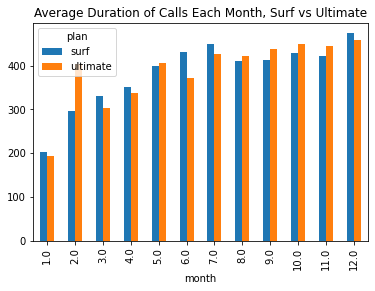

In [41]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
ave_duration = merged.pivot_table(index='month', columns='plan',values= 'duration', aggfunc='mean')
ave_duration.plot(kind='bar', title='Average Duration of Calls Each Month, Surf vs Ultimate')

In [42]:
# Comparing the number of minutes users of each plan require each month. Plot a histogram.
merged['required_minutes'] = merged['minutes_included'] - (merged['minutes_included'] - merged['duration'])
        

In [43]:
surf = merged.query('plan == "surf"')
ultimate = merged.query('plan == "ultimate"')

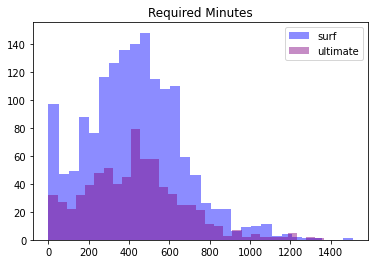

In [44]:
plt.hist(surf['required_minutes'], bins= 30, alpha=0.45, color= 'blue')
plt.hist(ultimate['required_minutes'], bins= 30, alpha=0.45, color= 'purple')
plt.title('Required Minutes')
plt.legend(['surf', 'ultimate'])

Surf Plan users tend to require more minutes per month compared to Ultimate Plan users.

In [45]:
# Calculating the mean and the variance of the monthly call duration
ave_duration.var()

plan
surf        5857.693038
ultimate    5970.044622
dtype: float64

In [46]:
ave_duration.mean()

plan
surf        384.469691
ultimate    387.999742
dtype: float64

<AxesSubplot:title={'center':'Distribution of Monthly Call Duration'}>

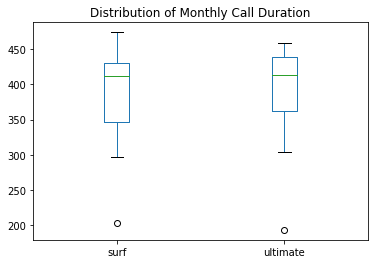

In [47]:
# Plotting a boxplot to visualize the distribution of the monthly call duration
ave_duration.plot(kind='box', title='Distribution of Monthly Call Duration')


There are no significant differences between the plans in terms of minutes spent during a call. Both plans' users tend to spend same amount of minutes in average per month.

### Messages

<AxesSubplot:title={'center':'Average Number of Messages Sent Each Month, Surf vs Ultimate'}, xlabel='month'>

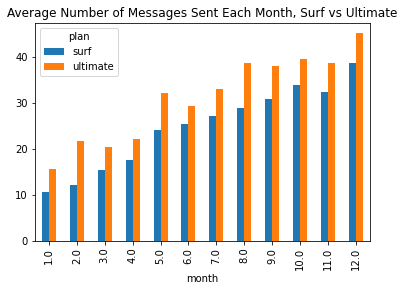

In [48]:
# Comparing the number of messages users of each plan tend to send each month
ave_messages = merged.pivot_table(index='month', columns='plan',values= 'number_messages', aggfunc='mean')
ave_messages.plot(kind='bar', title='Average Number of Messages Sent Each Month, Surf vs Ultimate')

In [49]:
merged['required_messages'] = merged['messages_included'] - (merged['messages_included'] - merged['number_messages'])
merged

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,month,number_calls,...,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,monthly_revenue,required_minutes,required_messages
0,1000,Anamaria,Bauer,adult,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12.0,16.0,...,1000,30720,3000,70,7,0.01,0.01,70.0,124.0,11.0
1,1006,Jesusa,Bradford,senior,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,11.0,2.0,...,1000,30720,3000,70,7,0.01,0.01,70.0,10.0,15.0
2,1006,Jesusa,Bradford,senior,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18,12.0,9.0,...,1000,30720,3000,70,7,0.01,0.01,84.0,59.0,139.0
3,1008,Emely,Hoffman,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,10.0,71.0,...,1000,30720,3000,70,7,0.01,0.01,70.0,476.0,21.0
4,1008,Emely,Hoffman,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN,11.0,63.0,...,1000,30720,3000,70,7,0.01,0.01,70.0,446.0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2298,1498,Scot,Williamson,adult,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,NaN,12.0,39.0,...,50,15360,500,20,10,0.03,0.03,100.0,339.0,0.0
2299,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,9.0,41.0,...,50,15360,500,20,10,0.03,0.03,20.0,346.0,0.0
2300,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,10.0,53.0,...,50,15360,500,20,10,0.03,0.03,70.0,385.0,0.0
2301,1499,Shena,Dickson,adult,"Orlando-Kissimmee-Sanford, FL MSA",2018-05-06,surf,NaN,11.0,45.0,...,50,15360,500,20,10,0.03,0.03,40.0,308.0,0.0


In [50]:
surf = merged.query('plan == "surf"')
ultimate = merged.query('plan == "ultimate"')

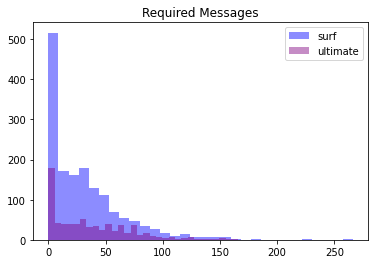

In [51]:
plt.hist(surf['required_messages'], bins= 30, alpha=0.45, color= 'blue')
plt.hist(ultimate['required_messages'], bins= 30, alpha=0.45, color= 'purple')
plt.title('Required Messages')
plt.legend(['surf', 'ultimate'])

Surf Plan users require more minutes per month compared to Ultimate Plan users.

In [52]:
ave_messages.var()

plan
surf        81.888846
ultimate    87.353963
dtype: float64

In [53]:
ave_messages.mean()

plan
surf        24.656000
ultimate    31.089497
dtype: float64

<AxesSubplot:title={'center':'Distribution of Number of Messages Sent Per Month'}>

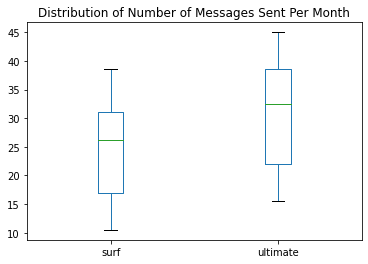

In [54]:
ave_messages.plot(kind='box', title='Distribution of Number of Messages Sent Per Month')


Ultimate Plans' users tend to send more messages compared to Surf Plans' users. Users are more likely to send more messages during December which might be due to holiday season. 

### Internet

In [55]:
# Comparing the amount of internet traffic consumed by users per plan

<AxesSubplot:title={'center':'Average Internet Usage Each Month, Surf vs Ultimate'}, xlabel='month'>

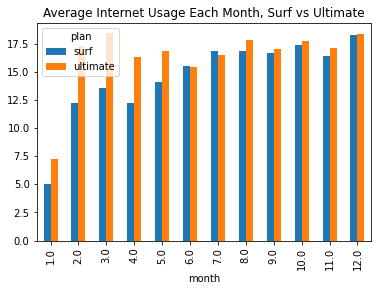

In [56]:
ave_internet = merged.pivot_table(index='month', columns='plan',values= 'gb_used', aggfunc='mean')
ave_internet.plot(kind='bar', title='Average Internet Usage Each Month, Surf vs Ultimate')

In [57]:
merged['required_internet'] = (merged['mb_per_month_included'] / 1024) - ((merged['mb_per_month_included'] /1024) - merged['gb_used'])

In [58]:
surf = merged.query('plan == "surf"')
ultimate = merged.query('plan == "ultimate"')

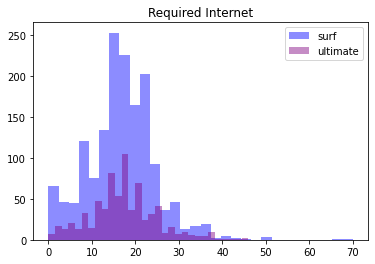

In [59]:
plt.hist(surf['required_internet'], bins= 30, alpha=0.45, color= 'blue')
plt.hist(ultimate['required_internet'], bins= 30, alpha=0.45, color= 'purple')
plt.title('Required Internet')
plt.legend(['surf', 'ultimate'])

Surf Plan users are more likely to exceed the amonunt of internet their plan includes compared to Ultimate Plan users. 


In [60]:
ave_internet.var()

plan
surf        13.164907
ultimate     8.946993
dtype: float64

In [61]:
ave_internet.mean()

plan
surf        14.594808
ultimate    16.346165
dtype: float64

<AxesSubplot:title={'center':'Distribution of Number of Messages Sent Per Month'}>

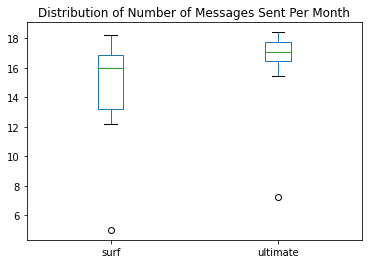

In [62]:
ave_internet.plot(kind='box', title='Distribution of Number of Messages Sent Per Month')


Surf Plan users are more likely to exceed their plan on internet usage which causes them to pay extra. In average, they spent 14513 mb which is almost what their plan offers. Ultimate Plan users tend to spend only half of their monthly limit and the distribution is lower. 

## Revenue

<AxesSubplot:title={'center':'Average Revenue For Each Month, Surf vs Ultimate '}, xlabel='month'>

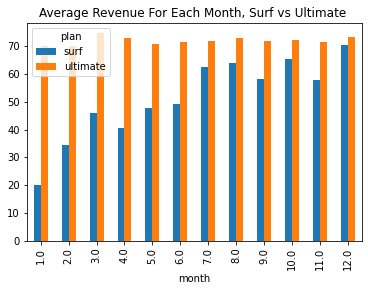

In [63]:
ave_revenue = merged.pivot_table(index='month', columns='plan',values= 'monthly_revenue', aggfunc='mean')
ave_revenue.plot(kind='bar', title='Average Revenue For Each Month, Surf vs Ultimate ')

In [64]:
merged.pivot_table(index='month', columns='plan',values= 'monthly_revenue', aggfunc='sum')

plan,surf,ultimate
month,,
1.0,40.00,280.0
2.0,309.57,490.0
3.0,1056.65,896.0
4.0,2035.53,1533.0
5.0,3667.37,2051.0
6.0,4779.80,3367.0
7.0,7583.56,4242.0
8.0,10356.85,5173.0
9.0,11304.67,6195.0


In [65]:
ave_revenue.var()

plan
surf        216.038742
ultimate      1.860681
dtype: float64

In [66]:
ave_revenue.mean()

plan
surf        51.401025
ultimate    72.011068
dtype: float64

<AxesSubplot:title={'center':'Distribution of Monthly Revenue'}>

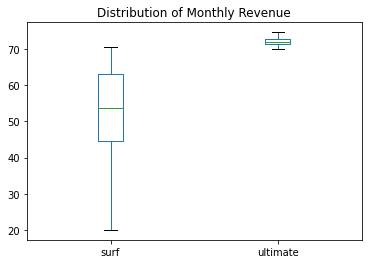

In [67]:
ave_revenue.plot(kind='box', title='Distribution of Monthly Revenue')

Surf Plan users pay more than their monthly plan cost almost every month whereas Ultime Plan users do not exceed their plan limits. In total, Surf Plan users bring in more revenue compared to Ultimmate Plan. In terms of variance, Surf Plan users have a higher distribution of revenue. 

## Test statistical hypotheses

H0: Average revenue of Surf and Ultimate plan doesn't differ. 

H1: Average revenue of Surf and Ultimate plan does differ.

In [68]:
# Testing the hypotheses
surf = ave_revenue['surf']

ultimate = ave_revenue['ultimate']

alpha = 0.05

results = st.ttest_ind(surf, ultimate)

print('p_value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')


p_value: 7.83119144714113e-05
We reject the null hypothesis.


In [70]:
ny_nj = merged.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
ny_nj_rev = ny_nj.pivot_table(index='month', values='monthly_revenue', aggfunc='mean')

In [71]:
other = merged.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
other_rev = other.pivot_table(index='month', values='monthly_revenue', aggfunc='mean')
other_rev

,monthly_revenue
month,
1.0,53.333333
2.0,50.683571
3.0,58.821034
4.0,52.506316
5.0,55.170455
6.0,58.808908
7.0,68.380136
8.0,68.487865
9.0,62.979528


H0: Average revenue of users from NY-NJ area and users from other regions doesn't differ. 

H1: Average revenue of users from NY-NJ area and users from other regions does differ.

In [273]:
# Testing the hypotheses

alpha = 0.05

results = st.ttest_ind(ny_nj_rev, other_rev)

print('p_value:', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')



p_value: [0.07228256]
We cannot reject the null hypothesis.


## General conclusion

To prepare the datat for analyzing, all dataframes were fixed by changing data types and sorting values by date. The duration of calls and total internet usage at the end of the month were rounded up. Number of calls, amount of minutes spent, number of messages sent, and amount of internet usage by each user per month was calculated and added as a new column. All data were merged and missing values were filled in with 0. Plan information was added to the merged dataframe based on the user's plan. Monthly revenue for each user was calculated by finding over limit usage then multiplying by its charge and adding it to monthly cost of the plan. This was added as a new column to the dataframe. Average duration of calls, number of messages sent, and amount of internet usage  per each plan per each month were compared and bar plots were plotted. For each variable, variance and mean were calculated and to understand the distribution boxplots were created. I found that duration of the calls don't vary by plan where as number of messages sent does vary. Ultimace Plan users send more messages in averarge per month compared to SUrf Plan users. The biggest difference between the two plans is internet usage. Surf Plan users tend to exceed their plan limit almost every month and be charged for extra usage. Ultimate Plan users, in average, only spend half of their Gbs included in their plan, thus pay no extra than their monthly plan cost. As in revenue, Ultime Plan users pay more each month than Surf Plan users as their plan is more expensive but in total Surf plan users bring in more revenue since they pay extra for every gb usage over their limit. It is statistically significant that the average reveune of users living in NY-NJ is different than the average revenue of users living in other regions.